In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from src.models.adversarial_attack import AdversarialAttack

/home/pessoal/miniconda3/envs/liveness/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /home/pessoal/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUEx

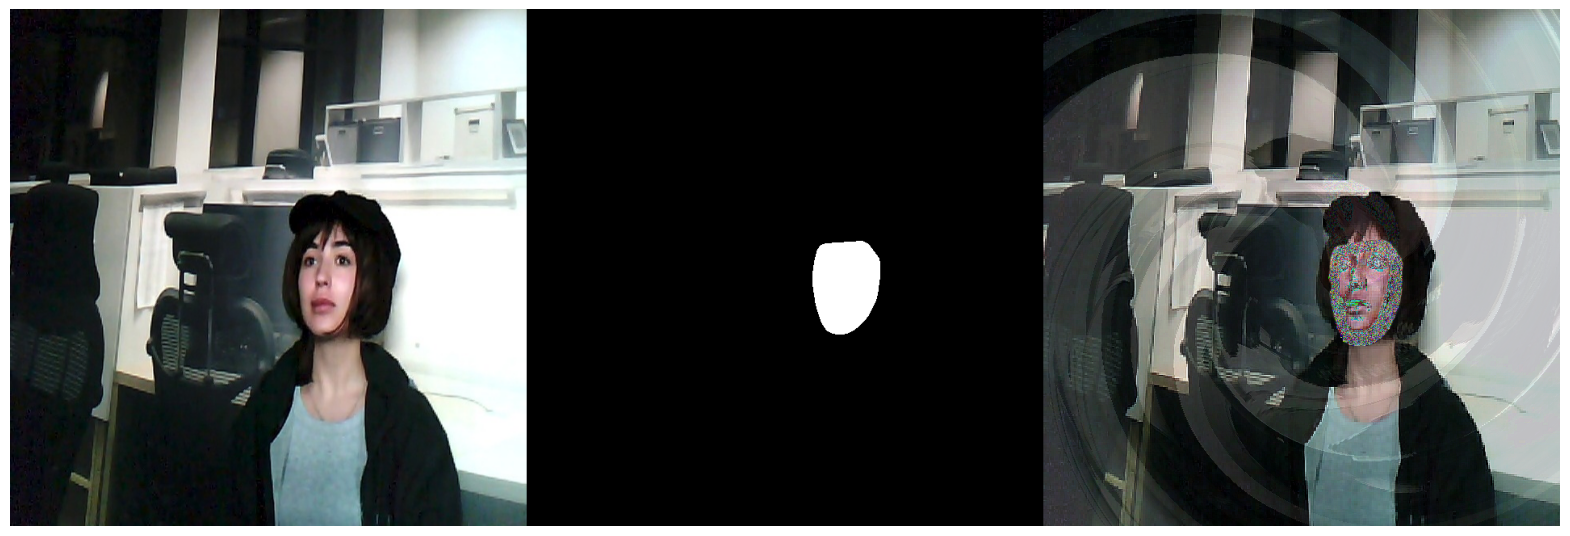

In [10]:
img = cv2.imread('../../data/silicone_video_frames/real/12.mp4_228.jpg')

adv_att = AdversarialAttack()

img_aug = adv_att.manipulate_image(img)

mask = np.dstack([adv_att.mask] * 3)
img = cv2.resize(img, (640, 640))

# Display the original image and the mask
side_by_side = np.hstack((img, mask, img_aug))
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(side_by_side, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()